In [1]:
#Import LIBRARIES needed

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import os

###### Read the DataSet (csv file) from the Directory

In [2]:
df = pd.read_csv('Selfie_Related_Injuries.csv')

In [3]:
# understanding the Cuurent working Directory, in other to debug the errotr
os.getcwd() 

'C:\\Users\\LENOVO\\OneDrive\\Documents\\PERSONAL\\PERSONAL\\PYTHON CODE CAMP\\PROJECT EDA'

In [4]:
# listing the DIR contents 
os.listdir()

['.ipynb_checkpoints',
 'CERTIFICATE - UDI TOWN CULTURAL ASSOCIATION.pdf',
 'en_marketrtd_537.zip',
 'Pandas Time Series Analysis Part 1_ DatetimeIndex and Resample.mp4',
 'Read Me.txt',
 'SELFIE_DEATHS.zip',
 'selfie_death_causes.ipynb',
 'Selfie_Related_Injuries.csv',
 'SUCCIDE_RATE_ANALYSIS',
 'Unconfirmed 629868.crdownload']

In [5]:
# Understanding the dataset
df.head(5)

,Date,Country,Injuries/Casualties,Type,Description
0,15-Oct-11,United States,3.0,Transport,Three teenagers (two sisters and a friend) wer...
1,14-Mar,Spain,1.0,Electrocution,A 21-year-old man was electrocuted after climb...
2,14-Mar,Russia,1.0,Transport,Two people were walking near train tracks when...
3,14-Apr,United States,1.0,Transport,A 32-year-old woman from North Carolina was dr...
4,22-Apr-14,Russia,1.0,Fall,A 17-year-old girl fell 30 ft to her death aft...


In [6]:
# To Identify NULL and taking care of them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 194 non-null    object 
 1   Country              193 non-null    object 
 2   Injuries/Casualties  193 non-null    float64
 3   Type                 193 non-null    object 
 4   Description          193 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.7+ KB


 Analysis: The dataset has 5 columns (header) and the Date column (194 entries), while 193 entries for (Country,Injuries/Casulties,Type and Description) columns, Indicating that we have a missiing/null data in the datasets.

In [7]:
# Eploring to get the missing data in the Dataset
df.isna()

,Date,Country,Injuries/Casualties,Type,Description
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
189,False,False,False,False,False
190,False,False,False,False,False
191,False,False,False,False,False
192,False,True,True,False,False


This reviews that we have a missing data in Lines (192,193), thus droping the rows with empty dataset, since we dont have the infomation will help us getting more insights in the dataset.

Droping the rows with empty data values, thus making a copy of the original dataset,adhering to best practise of data management, as well ability to revert back to original version incase of error or dataloss.

In [8]:
# Creating copy of original dataset (df1) and dropping Null data
df1 = df.dropna()

In [9]:
df1.isna()

,Date,Country,Injuries/Casualties,Type,Description
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
187,False,False,False,False,False
188,False,False,False,False,False
189,False,False,False,False,False
190,False,False,False,False,False


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 192 non-null    object 
 1   Country              192 non-null    object 
 2   Injuries/Casualties  192 non-null    float64
 3   Type                 192 non-null    object 
 4   Description          192 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.0+ KB


Analysisi: with 192 entries accross all the 5 columns, shows no the datset has no missing or Null values.

In [11]:
# TO undertsnad the top 5 country with recorded selfie death.
df1_country = df1["Country"].value_counts().reset_index()
df1_country.head(5)

,Country,count
0,India,71
1,United States,18
2,Russia,14
3,Pakistan,8
4,Spain,5


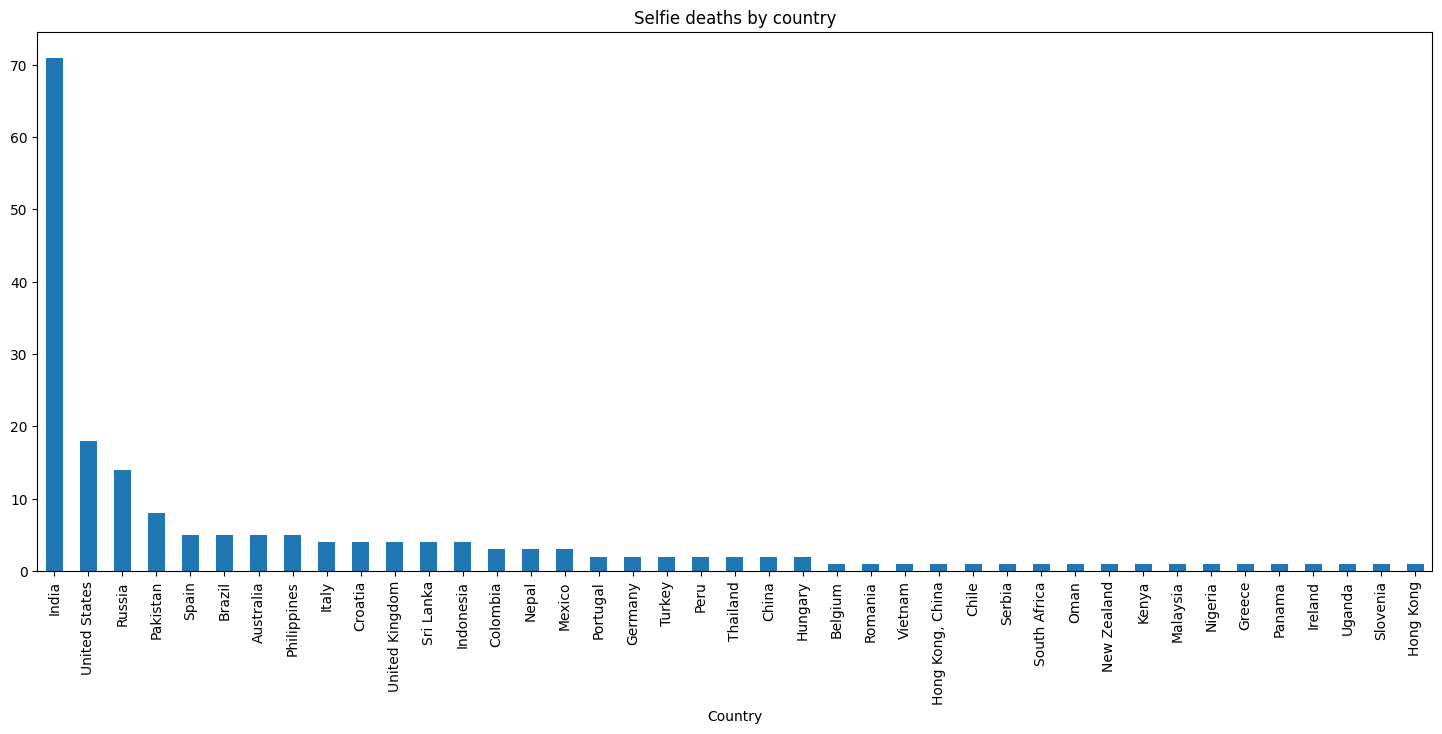

In [12]:
# ploting the country death by selfie (using pandas)
df1["Country"].value_counts().plot(kind='bar', figsize=(18,7)).set(title="Selfie deaths by country")
plt.show()

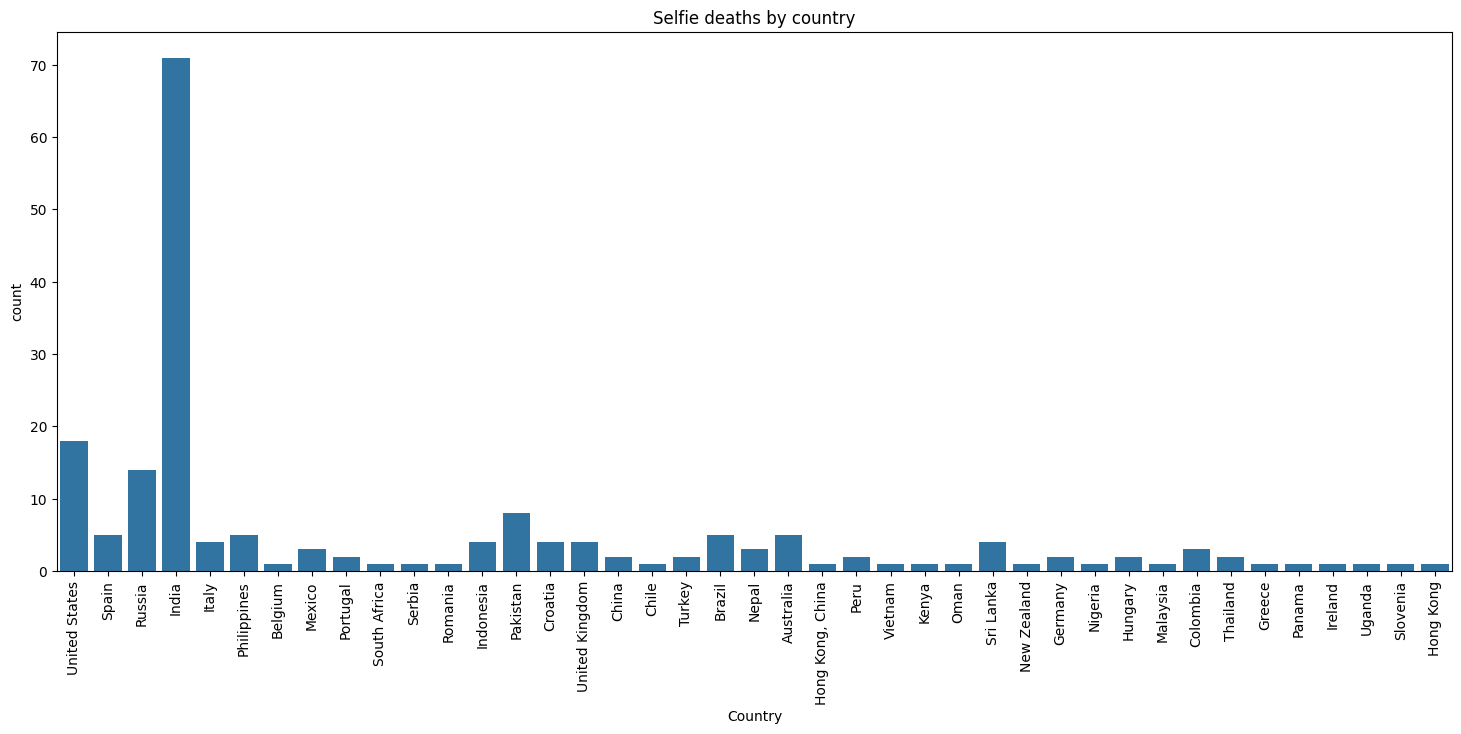

In [13]:
# ploting the country death by selfie (using sns)
plt.figure(figsize=(18,7))
sns.countplot(x="Country",data=df1).set(title="Selfie deaths by country")
plt.xticks(rotation=90)
plt.show()

In [15]:
df1_country=df1["Country"].value_counts().reset_index()
plt.figure(figsize=(18,7))
sns.barplot(x="index",y="Country",data=df1_country).set(title="Selfie death by country")
plt.xticks(rotations=90)
plt.show()

ValueError: Could not interpret value `index` for `x`. An entry with this name does not appear in `data`.

In [16]:
## Automaticly the {df1_country=df1["Country"].value_counts().reset_index()} should have index column but it seems my pandas version not recognizing it,
df1_country=df1["Country"].value_counts().reset_index()
df1_country.head(3)

,Country,count
0,India,71
1,United States,18
2,Russia,14


In [ ]:
df1_country=df1["Country"].value_counts().reset_index()
plt.figure(figsize=(18,7))
sns.barplot(x="Country",y="count",data=df1_country).set(title="Selfie death by country")
plt.xticks(rotation=90)
plt.show()

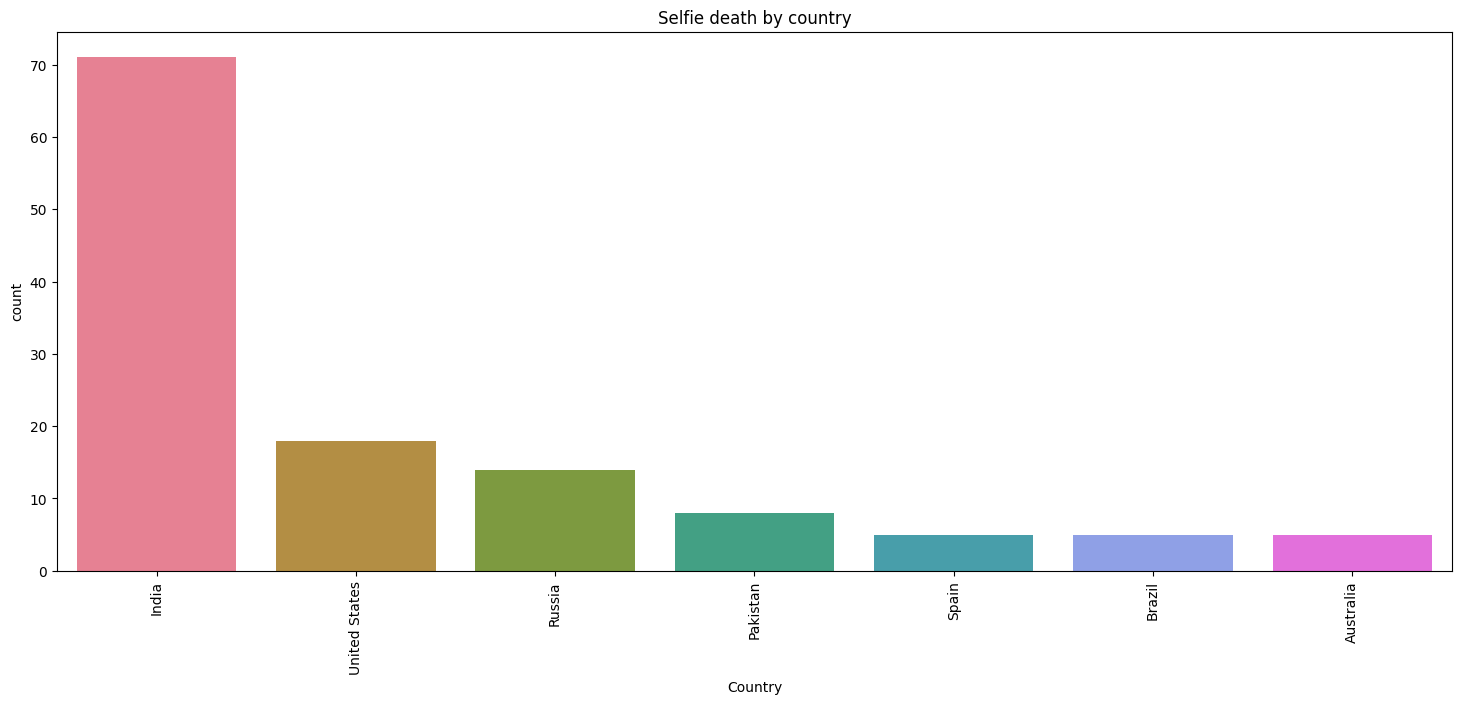

In [18]:
# With my version of Seasborn requring using hue, thus:
df1_country=df1["Country"].value_counts().reset_index()
plt.figure(figsize=(18,7))
sns.barplot(x="Country",y="count",hue="Country",data=df1_country[:7],palette='husl').set(title="Selfie death by country")
plt.xticks(rotation=90)
plt.show()

Observation: we can see that India has more selfie recorded casualties, seconded by United states and then Russia, with Austrial being the least

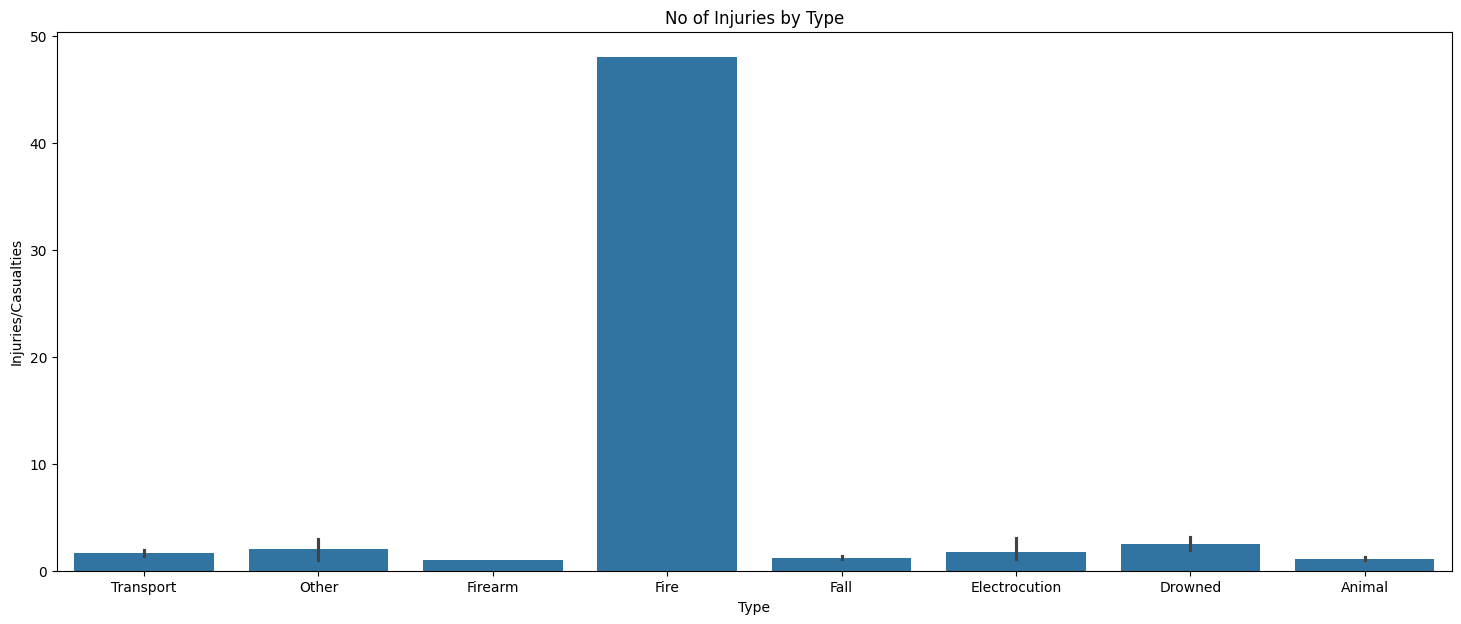

In [19]:
# Ploting the casulties type and Count of people affected
df1_sorted = df1.sort_values("Type",ascending=False)
plt.figure(figsize=(18,7))
sns.barplot(x="Type",y="Injuries/Casualties",data=df1_sorted).set(title="No of Injuries by Type")
plt.show()

Analysis: We observe that Fire was the Most occured type of Injuries or casulaties caused by Selfie, then drowned and electrocution.

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 147 non-null    datetime64[ns]
 1   Country              192 non-null    object        
 2   Injuries/Casualties  192 non-null    float64       
 3   Type                 192 non-null    object        
 4   Description          192 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 9.0+ KB


In [24]:
df1 = pd.read_csv("Selfie_Related_Injuries.csv", parse_dates=["Date"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3120\1001919184.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv("Selfie_Related_Injuries.csv", parse_dates=["Date"])


In [27]:
df1["Date"]

0      15-Oct-11
1         14-Mar
2         14-Mar
3         14-Apr
4      22-Apr-14
         ...    
189    11-Jul-21
190    28-Jul-21
191     6-Aug-21
192     6-Aug-21
193    10-Jul-21
Name: Date, Length: 194, dtype: object

Observations and Challanges: Because my date column data is insconsistent,14-Mar(DD-MM-YY), 22-Apr-14 (DD-MM-YY), That is the column have a mix of full and partial date, I had to find a solution to make the format uniform, using cursor or gpt LLM let me read about it.

In [28]:
# This function will take ONE date string and try to convert it
def parse_mixed_dates(date_str):
    try:
        # Try full format like '15-Oct-11'
        return pd.to_datetime(date_str, format="%d-%b-%y", errors='raise')
    except:
        try:
            # Try adding 2014 to short formats like '14-Mar' → '14-Mar-2014' Sine my Data short date is '2014'
            return pd.to_datetime(f"{date_str}-2014", format="%d-%b-%Y", errors='raise')
        except:
            # If both fail, return missing time
            return pd.NaT


In [29]:
print(parse_mixed_dates("15-Oct-11"))  # should print: 2011-10-15
print(parse_mixed_dates("14-Mar"))     # should print: 2014-03-1


2011-10-15 00:00:00
2014-03-14 00:00:00


In [30]:
df1['Date'] = df1['Date'].apply(parse_mixed_dates)


In [32]:
print(df1["Date"].head(4))

0   2011-10-15
1   2014-03-14
2   2014-03-14
3   2014-04-14
Name: Date, dtype: datetime64[ns]


In [33]:
# Now changing it to timestamp
df1["Date"] = pd.to_datetime(df1["Date"])

In [34]:
type(df1.Date[4])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
print(df1["Date"].head(3))

0   2011-10-15
1   2014-03-14
2   2014-03-14
Name: Date, dtype: datetime64[ns]


In [36]:
df1.head(2)

,Date,Country,Injuries/Casualties,Type,Description
0,2011-10-15,United States,3.0,Transport,Three teenagers (two sisters and a friend) wer...
1,2014-03-14,Spain,1.0,Electrocution,A 21-year-old man was electrocuted after climb...


In [37]:
# Making the date column to be the Index,
df1.set_index("Date", inplace=True)

In [38]:
df1.head(5)

,Country,Injuries/Casualties,Type,Description
Date,,,,
2011-10-15,United States,3.0,Transport,Three teenagers (two sisters and a friend) wer...
2014-03-14,Spain,1.0,Electrocution,A 21-year-old man was electrocuted after climb...
2014-03-14,Russia,1.0,Transport,Two people were walking near train tracks when...
2014-04-14,United States,1.0,Transport,A 32-year-old woman from North Carolina was dr...
2014-04-22,Russia,1.0,Fall,A 17-year-old girl fell 30 ft to her death aft...


In [42]:
df1.index

DatetimeIndex(['2011-10-15', '2014-03-14', '2014-03-14', '2014-04-14',
               '2014-04-22', '2014-05-14', '2014-05-31', '2014-06-14',
               '2014-07-14', '2014-07-24',
               ...
               '2020-04-30', '2020-12-12', '2021-01-12', '2021-05-16',
               '2021-07-10', '2021-07-11', '2021-07-28', '2021-08-06',
               '2021-08-06', '2021-07-10'],
              dtype='datetime64[ns]', name='Date', length=194, freq=None)

In [43]:
df1["2014-04-14"]

KeyError: '2014-04-14'

In [44]:
df1.loc["2014-04-14"]

Country                                                    United States
Injuries/Casualties                                                  1.0
Type                                                           Transport
Description            A 32-year-old woman from North Carolina was dr...
Name: 2014-04-14 00:00:00, dtype: object

In [55]:
# Renaming the column "Injuries/Casualties" to Casualties
df1.rename(columns={"Injuries/Casualties": "Casualties"},inplace = True)

In [56]:
df1.loc["2014-04-14"]

Country                                            United States
Casualties                                                   1.0
Type                                                   Transport
Description    A 32-year-old woman from North Carolina was dr...
Name: 2014-04-14 00:00:00, dtype: object

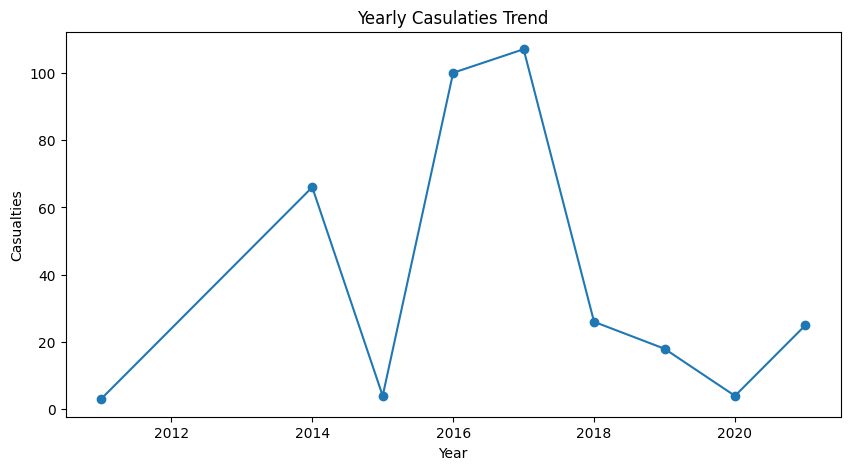

In [90]:
# Ploting the trendline of the injuries using inline matplotlib
%matplotlib inline
df1.groupby(df1.index.year)["Casualties"].sum().plot(marker='o', figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.title("Yearly Casulaties Trend")
plt.show()

Observation: We can onbserved the increase in Casulaties trend with highest in 2017 and second 2026, and a sharp decline, thus indicating the need to drill down to understand spike

In [84]:
# Grouping the Date by year into new data frame
yearly = df1.groupby(df1.index.year)["Casualties"].sum().reset_index()

<Figure size 1000x500 with 0 Axes>

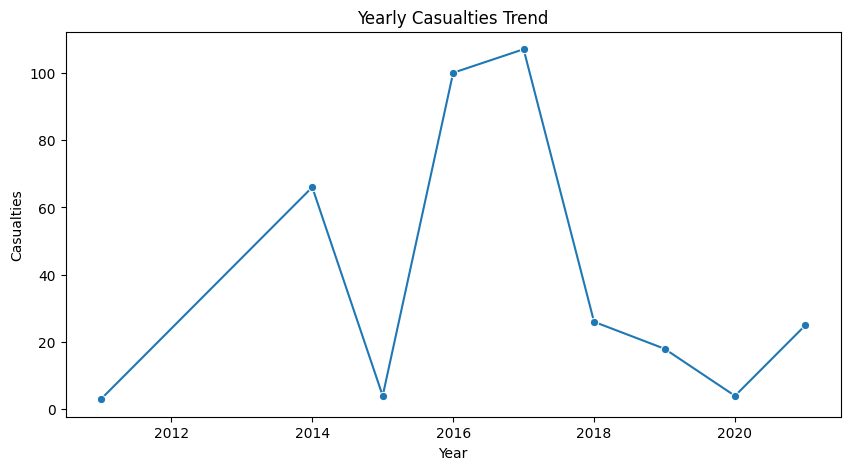

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a yearly summary (no new column needed)
yearly = df1.groupby(df1.index.year)["Casualties"].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Casualties", data=yearly, marker='o')
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.title("Yearly Casualties Trend")
plt.show()

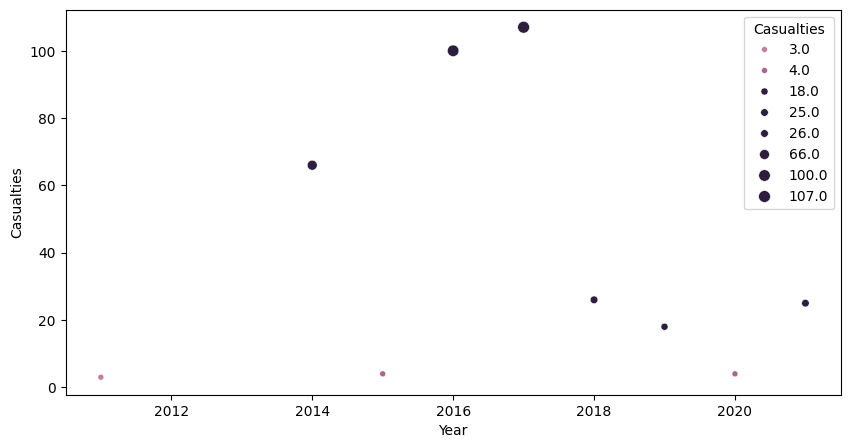

In [101]:
# Create a yearly summary (no new column needed)
yearly = df1.groupby(df1.index.year)["Casualties"].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Date", y="Casualties", data=yearly, hue="Casualties", size="Casualties", hue_norm=(0,8), legend = "full")
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.show()